# Regression forecasting and predicting
* Replicate the youtbue video cource from ML playlist(pt.1 - pt.5) from sentdex
* Predict the stock price of google

In [178]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate #depreciate >2.0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [179]:
# Read the data form Quandl
df = quandl.get('WIKI/GOOGL') #internet required

print(df.describe())

              Open         High          Low        Close        Volume  \
count  3424.000000  3424.000000  3424.000000  3424.000000  3.424000e+03   
mean    596.602610   602.045438   590.571710   596.352862  7.818568e+06   
std     226.989782   227.783310   225.846581   226.896692  8.248211e+06   
min      99.090000   101.740000    95.960000   100.010000  5.211410e+05   
25%     461.157500   465.392500   456.065000   461.205000  2.430647e+06   
50%     565.120000   569.599950   559.860000   564.940000  5.076200e+06   
75%     735.627500   740.850000   728.680025   733.262500  1.020910e+07   
max    1226.800000  1228.880000  1218.600000  1220.170000  8.215110e+07   

       Ex-Dividend  Split Ratio    Adj. Open    Adj. High     Adj. Low  \
count  3424.000000       3424.0  3424.000000  3424.000000  3424.000000   
mean      0.165880          1.0   409.221461   412.786556   405.227809   
std       9.706436          0.0   257.844081   259.366718   255.981628   
min       0.000000          

In [180]:
print (df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [181]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]

In [182]:
print (df)

              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume
Date                                                                       
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0
2004-08-26    52.637487    54.142132    52.492038    54.122070    7094800.0
2004-08-27    54.217364    54.478169    53.008633    53.239345    6211700.0
2004-08-30    52.802998    52.908323    51.162935    51.162935    5196700.0
2004-08-31    51.318415    52.015567    51.238167    51.343492    4917800.0
2004-09-01    51.509003    51.644421    49.989312    50.280210    9138200.0
2004-09-02    49.698414    51.343492    49.623182    50.912161   15118600.0
2004-09-03  

In [183]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100
df['PCT_changes'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

In [184]:
print (df)

              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume  \
Date                                                                          
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0   
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0   
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0   
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0   
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0   
2004-08-26    52.637487    54.142132    52.492038    54.122070    7094800.0   
2004-08-27    54.217364    54.478169    53.008633    53.239345    6211700.0   
2004-08-30    52.802998    52.908323    51.162935    51.162935    5196700.0   
2004-08-31    51.318415    52.015567    51.238167    51.343492    4917800.0   
2004-09-01    51.509003    51.644421    49.989312    50.280210    9138200.0   
2004-09-02    49.698414    51.343492    49.623182   

In [185]:
# prepare columns, [close, high low difference, daily percentage change, daily trading volumns]
df = df[['Adj. Close','HL_PCT','PCT_changes','Adj. Volume']]
print (df.head())

            Adj. Close    HL_PCT  PCT_changes  Adj. Volume
Date                                                      
2004-08-19   50.322842  8.072956     0.324968   44659000.0
2004-08-20   54.322689  7.921706     7.227007   22834300.0
2004-08-23   54.869377  4.049360    -1.227880   18256100.0
2004-08-24   52.597363  7.657099    -5.726357   15247300.0
2004-08-25   53.164113  3.886792     1.183658    9188600.0


In [186]:
forecast_col = 'Adj. Close'
# Replace NA with specific value
df.fillna(-99999, inplace=True)

In [187]:
print ("---scale down to 10% of whole dataset---")
#forecast_out = int(math.ceil(0.01*len(df)))
temp_lendf = len(df)
print ('lenth of df: {}'.format(temp_lendf))
temp_scaledown = 0.01 * temp_lendf
print ('scale down 1%: {}'.format(temp_scaledown))
temp_ceil = math.ceil(temp_scaledown)
print ('take the ceiling value: {}'.format(temp_ceil))
forecast_out = int(temp_ceil)
print ('make the value integer: {} rows needed'.format(forecast_out))

---scale down to 10% of whole dataset---
lenth of df: 3424
scale down 1%: 34.24
take the ceiling value: 35
make the value integer: 35 rows needed


In [188]:
df['label'] = df[forecast_col].shift(-forecast_out)

print(df.tail())

            Adj. Close    HL_PCT  PCT_changes  Adj. Volume  label
Date                                                             
2018-03-21     1094.00  1.964351     0.130884    1990515.0    NaN
2018-03-22     1053.15  3.254997    -2.487014    3418154.0    NaN
2018-03-23     1026.55  4.082607    -2.360729    2413517.0    NaN
2018-03-26     1054.09  4.619150     0.332191    3272409.0    NaN
2018-03-27     1006.94  6.645878    -5.353887    2940957.0    NaN


In [189]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]


df.dropna(inplace=True) # remove predict rows of y for trainning
y = np.array(df['label'])

print(len(X),len(y))
print("----------------------------------")
print(X)
print("----------------------------------")
print(y)

3389 3389
----------------------------------
[[-1.39187095  4.25846492  0.23254018  4.46712802]
 [-1.37635178  4.15018674  4.81828847  1.8207495 ]
 [-1.37423066  1.3780063  -0.79917922  1.26561472]
 ...
 [ 2.99737935 -0.42487551  0.33301614 -0.61156746]
 [ 2.7553098  -0.23328983 -0.46778619 -0.24489949]
 [ 2.55960556  2.38088557 -1.90605746 -0.49425191]]
----------------------------------
[  69.0782379    67.83941377   68.91272699 ... 1026.55       1054.09
 1006.94      ]


In [190]:
# train the array data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
#clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [191]:
# use pickle to save classifier-pt.6 of the video
# can save once and load after when use
import pickle
#with open('linearregression.pickle', 'wb') as f:   #already saved
#    pickle.dump(clf, f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


In [192]:
# find the confidence of the classifier by input test X and y, it also can be named as accuracy
confidence = clf.score(X_test, y_test)

#print(accuracy)

In [193]:
forecast_set = clf.predict(X_lately)
print (forecast_set, confidence, forecast_out)

[1078.80410428 1092.87948932 1106.58838471 1101.47115168 1095.05049455
 1092.96112705 1091.70369864 1087.82547924 1082.03592094 1077.55057191
 1075.77997002 1093.90781306 1112.44270828 1118.04254068 1132.59471666
 1136.9319627  1135.12515637 1132.89954445 1134.6163057  1151.937714
 1151.57991594 1161.23937507 1157.92485419 1166.26291162 1185.83906562
 1199.17884117 1192.92086172 1205.0794957  1209.6050989  1209.28113093
 1200.04925687 1204.8966     1203.54524841 1138.78055053 1083.10006243] 0.9772295908412661 35


In [194]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [195]:
df['Forecast'] = np.nan
print(df)
last_date = df.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(len(df.columns)-1) #last colume

             Adj. Close    HL_PCT  PCT_changes  Adj. Volume        label  \
Date                                                                       
2004-08-19    50.322842  8.072956     0.324968   44659000.0    69.078238   
2004-08-20    54.322689  7.921706     7.227007   22834300.0    67.839414   
2004-08-23    54.869377  4.049360    -1.227880   18256100.0    68.912727   
2004-08-24    52.597363  7.657099    -5.726357   15247300.0    70.668146   
2004-08-25    53.164113  3.886792     1.183658    9188600.0    71.219849   
2004-08-26    54.122070  3.048837     2.820391    7094800.0    72.278116   
2004-08-27    53.239345  2.760245    -1.803885    6211700.0    74.810934   
2004-08-30    51.162935  3.411430    -3.106003    5196700.0    74.199045   
2004-08-31    51.343492  1.514115     0.048866    4917800.0    70.462511   
2004-09-01    50.280210  3.291771    -2.385589    9138200.0    74.921275   
2004-09-02    50.912161  3.378977     2.442224   15118600.0    86.481962   
2004-09-03  

In [196]:
for i in forecast_set:
    print(i)
    next_date = datetime.datetime.fromtimestamp(next_unix)
    print (next_date)
    next_unix = next_unix + one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] 
    #for anything in last column if = nan then + i value, not sure the syntax??????????????????
    print(df)

1078.8041042751227
2018-02-06 08:00:00
                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                      Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                   
2004-08-19 00:00:00    50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00    54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00    54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00    52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00    53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00    54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00    53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00    51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00    51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00    50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00    50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00    50.159839  2.419758    -0.931154    51524

                     Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                  
2004-08-19 00:00:00   50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00   54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00   54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00   52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00   53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00   54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00   53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00   51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00   51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00   50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00   50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00   50.159839  2.419758    -0.931154    5152400.0   
2004-0

                     Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                  
2004-08-19 00:00:00   50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00   54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00   54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00   52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00   53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00   54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00   53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00   51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00   51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00   50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00   50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00   50.159839  2.419758    -0.931154    5152400.0   
2004-0

                     Adj. Close    HL_PCT  PCT_changes  Adj. Volume  \
Date                                                                  
2004-08-19 00:00:00   50.322842  8.072956     0.324968   44659000.0   
2004-08-20 00:00:00   54.322689  7.921706     7.227007   22834300.0   
2004-08-23 00:00:00   54.869377  4.049360    -1.227880   18256100.0   
2004-08-24 00:00:00   52.597363  7.657099    -5.726357   15247300.0   
2004-08-25 00:00:00   53.164113  3.886792     1.183658    9188600.0   
2004-08-26 00:00:00   54.122070  3.048837     2.820391    7094800.0   
2004-08-27 00:00:00   53.239345  2.760245    -1.803885    6211700.0   
2004-08-30 00:00:00   51.162935  3.411430    -3.106003    5196700.0   
2004-08-31 00:00:00   51.343492  1.514115     0.048866    4917800.0   
2004-09-01 00:00:00   50.280210  3.291771    -2.385589    9138200.0   
2004-09-02 00:00:00   50.912161  3.378977     2.442224   15118600.0   
2004-09-03 00:00:00   50.159839  2.419758    -0.931154    5152400.0   
2004-0

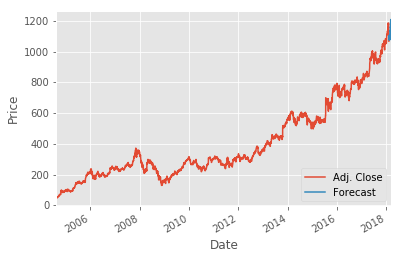

In [197]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()